# Draw 2D skeleton

In [1]:
import matplotlib.pyplot as plt
import os, json
import numpy as np
import pandas as pd
import cv2
%matplotlib inline

In [3]:
parents = [-1, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21]
train_names = pd.read_csv('../../data/surreal_train_names.csv')['name'].values
valid_names = pd.read_csv('../../data/surreal_valid_names.csv')['name'].values
images_path = '../../data/SURREAL/summary/image/'
labels_path = '../../data/SURREAL/summary/labels/'
line = [[i, j] for i, j in enumerate(parents)][1:]

In [6]:
names_filter = pd.read_csv('/home/windward/gcy/Golf/proj/data/names_filter.csv')['name_filter'].map(
    lambda x: x + '.jpg')
labels_filter = pd.read_csv('/home/windward/gcy/Golf/proj/data/names_filter.csv')['name_filter'].map(
    lambda x: x + '.json')
names_filter = list(names_filter)
labels_filter = list(labels_filter)

In [5]:
def plot_keypoints(image, keypoints, line, ax):
    human_value = keypoints.astype('int')
#     cv2.circle(image, (0,0), 0, (255,69,0), 30)
    for i in range(24):
        color=(255,69,0)

        cv2.circle(image,(human_value[i][0],human_value[i][1]),0,color,2)
        ax.text(human_value[i][0]+2, human_value[i][1]+2, str(i),
            color='red', size=10, backgroundcolor="none")
    for j in range(len(line)):
        if human_value[line[j][0]][-1]!=-1 and human_value[line[j][1]][-1]!=-1:
            # 不可推测点不进行连线
            cv2.line(image,(human_value[line[j][0]][0],human_value[line[j][0]][1]),
                     (human_value[line[j][1]][0],human_value[line[j][1]][1]),[160,82,45],1)
    return image

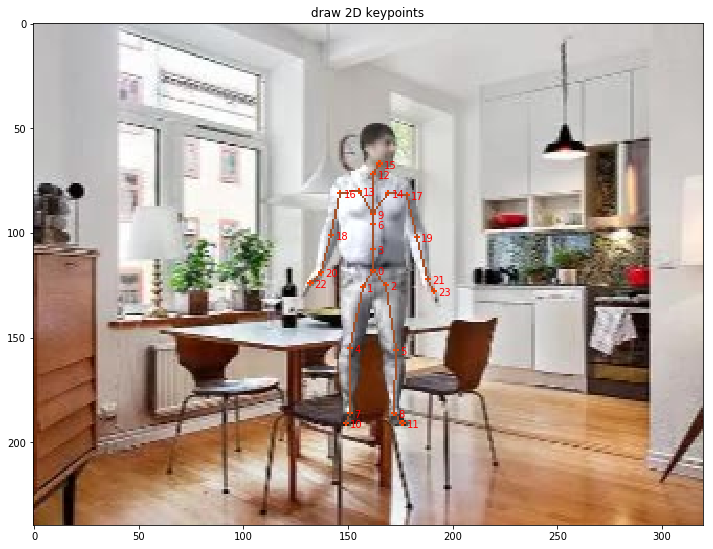

In [10]:
i = 500
image_path = os.path.join(images_path, train_names[i])
label_path = os.path.join(labels_path, train_names[i][:-3]+'json')
# i = 19
# image_path = os.path.join(images_path, names_filter[i])
# label_path = os.path.join(labels_path, labels_filter[i])
image = plt.imread(image_path)
key_image = image.copy()
with open(label_path) as f:
    label = json.load(f)
gt2ds = np.array(label['joints2D']).reshape(2, 24).T

fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(121)
# ax.set_title('origin image')
# ax.imshow(image)

ax = fig.add_subplot(111)
key_image = plot_keypoints(key_image, gt2ds, line, ax)

ax.set_title('draw 2D keypoints')
ax.imshow(key_image)
plt.show()

# Draw 3D skeleton

In [18]:
import matplotlib.pyplot as plt
import os, json
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import cv2
%matplotlib inline

In [11]:
parents = [-1, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21]
train_names = pd.read_csv('../../data/surreal_train_names.csv')['id'].values
valid_names = pd.read_csv('../../data/surreal_valid_names.csv')['id'].values
images_path = '../../data/SURREAL/summary/image/'
labels_path = '../../data/SURREAL/summary/labels/'
line = [[i, j] for i, j in enumerate(parents)][1:]

In [61]:
def plot_keypoints3d(keypoints3d, line, ax):
    human_value = keypoints3d.astype('int')
    human_value[:, [1,2]] = human_value[:, [2,1]]
    human_value[:, 2] = -human_value[:, 2]
    for i in range(24):
        ax.scatter(human_value[i][0], human_value[i][1], human_value[i][2], c='red') 
        ax.text(human_value[i][0]+1, human_value[i][1]+1, human_value[i][2]+1, str(i), 
                color='red', size=10, backgroundcolor="none")
#         print(joints[i]+': '+str(human_value[i][0]-(human_value[6][0]+human_value[11][0])/2)+', '
#               +str(human_value[i][1]-(human_value[6][1]+human_value[11][1])/2)+', '
#               +str(human_value[i][2]-(human_value[6][2]+human_value[11][2])/2))
    for j in line:
        ax.plot([human_value[j[0]][0], human_value[j[1]][0]], 
            [human_value[j[0]][1], human_value[j[1]][1]], 
            [human_value[j[0]][2], human_value[j[1]][2]], color='g')
    return ax

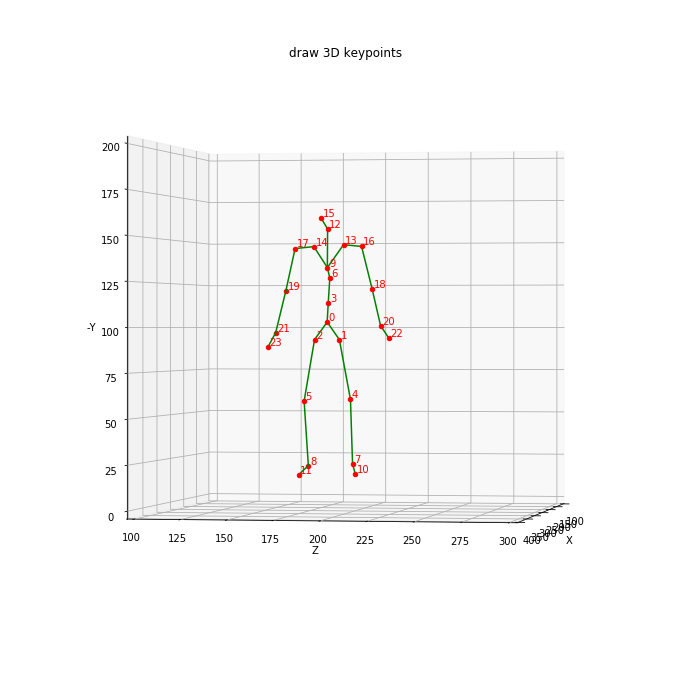

In [68]:
i = 500
image_path = os.path.join(images_path, train_names[i])
label_path = os.path.join(labels_path, train_names[i][:-3]+'json')
image = plt.imread(image_path)
key_image = image.copy()
with open(label_path) as f:
    label = json.load(f)
gt3ds = np.array(label['joints3D']).reshape(3, 24).T * 100

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
key_image = plot_keypoints3d(gt3ds, line, ax)

ax.set_title('draw 3D keypoints')
ax.set_zlabel('-Y')  # 坐标轴
ax.set_ylabel('Z')
ax.set_xlabel('X')
ax.view_init(elev=0, azim=10)  #elev俯仰角度  azim是旋转角度
ax.set_xlim(100, 400)
ax.set_ylim(100, 300)
ax.set_zlim(0, 200)
plt.show()

# SMPL flip

In [11]:
import numpy as np
from opendr.renderer import ColoredRenderer
from opendr.lighting import LambertianPointLight
from opendr.camera import ProjectPoints
import pandas as pd
import sys, os
sys.path.append("/home/windward/gcy/Golf/SMPL/smpl/")
from smpl_webuser.serialization import load_model
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
parents = [-1, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21]
joints_left = [1, 4, 7, 10, 13, 16, 18, 20, 22]
joints_right = [2, 5, 8, 11, 14, 17, 19, 21, 23]

In [7]:
train_names = pd.read_csv('../../data/surreal_train_names.csv')['name'].values
valid_names = pd.read_csv('../../data/surreal_valid_names.csv')['name'].values
images_path = '../../data/SURREAL/summary/image/'
labels_path = '../../data/SURREAL/summary/labels/'
i = 500
image_path = os.path.join(images_path, train_names[i])
label_path = os.path.join(labels_path, train_names[i][:-3]+'json')
image = plt.imread(image_path)
key_image = image.copy()
with open(label_path) as f:
    label = json.load(f)
pose = np.array(label['pose'])
shape = np.array(label['shape'])

In [19]:
pose_copy = pose.copy().reshape((24, 3))
pose_copy[joints_left, :] = pose.reshape((24, 3))[joints_right, :]
pose_copy[joints_right, :] = pose.reshape((24, 3))[joints_left, :]

In [2]:
# Load SMPL model (here we load the female model)
m = load_model('/home/windward/gcy/Golf/SMPL/smpl/models/basicModel_f_lbs_10_207_0_v1.0.0.pkl')

In [24]:
m.pose[:] = pose_copy.ravel()
# m.pose[:] = pose
m.betas[:] = shape
m.pose[0] = np.pi

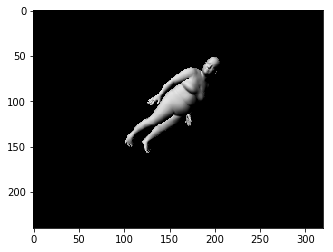

In [14]:
# Create OpenDR renderer
rn = ColoredRenderer()
# Assign attributes to renderer
h, w = (240, 320)
rn.camera = ProjectPoints(v=m, rt=np.zeros(3), t=np.array([0, 0, 2.]), f=np.array([w, w])/2., 
                          c=np.array([w, h])/2., k=np.zeros(5))
rn.frustum = {'near': 1., 'far': 10., 'width': w, 'height': h}
rn.set(v=m, f=m.f, bgcolor=np.zeros(3))
# Construct point light source
rn.vc = LambertianPointLight(
    f=m.f,
    v=rn.v,
    num_verts=len(m),
    light_pos=np.array([-1000, -1000, -2000]),
    vc=np.ones_like(m)*.9,
    light_color=np.array([1., 1., 1.]))

plt.ion()
plt.imshow(rn.r)
plt.show()

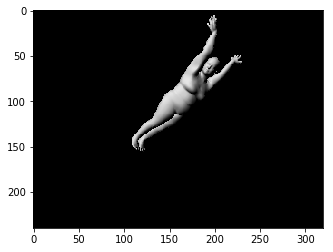

In [25]:
# Create OpenDR renderer
rn = ColoredRenderer()
# Assign attributes to renderer
h, w = (240, 320)
rn.camera = ProjectPoints(v=m, rt=np.zeros(3), t=np.array([0, 0, 2.]), f=np.array([w, w])/2., 
                          c=np.array([w, h])/2., k=np.zeros(5))
rn.frustum = {'near': 1., 'far': 10., 'width': w, 'height': h}
rn.set(v=m, f=m.f, bgcolor=np.zeros(3))
# Construct point light source
rn.vc = LambertianPointLight(
    f=m.f,
    v=rn.v,
    num_verts=len(m),
    light_pos=np.array([-1000, -1000, -2000]),
    vc=np.ones_like(m)*.9,
    light_color=np.array([1., 1., 1.]))

plt.ion()
plt.imshow(rn.r)
plt.show()